<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1C3C5E ;font-family:newtimeroman;color:white;font-size:300%;text-align:center;border-radius:60px 1px;">Project Content </p> 
    
<ul style = color:#4A5C70;font-size:160%;>
    <li> Import librarries</li>
    <li> Read dataset</li>
    <li> Get information about data</li>
    <li> Data cleaning</li>
    <li> Data visualization & getting conclusions</li>
</ul>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#516B87;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Import libraries
</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#516B87;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Read dataset
</p>
</div>

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#516B87;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Get information about data
</p>
</div>

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#516B87;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Cleaning
</p>
</div>

<p style="background-color:#808E9C;color:white;font-size:200%;"> Un Necessary columns </p>

In [8]:
df.drop(['PassengerId', 'Name','Ticket'],axis=1,inplace=True)

<p style="color:#2965A5;
          font-size:22px;"> -> Un necessary columns removed </p>

<p style="background-color:#808E9C;color:white;font-size:200%;"> Remove Duplicates </p>

In [9]:
df[df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
47,1,3,female,NaN,0,0,7.7500,NaN,Q
76,0,3,male,NaN,0,0,7.8958,NaN,S
77,0,3,male,NaN,0,0,8.0500,NaN,S
87,0,3,male,NaN,0,0,8.0500,NaN,S
95,0,3,male,NaN,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,NaN,S
877,0,3,male,19.0,0,0,7.8958,NaN,S
878,0,3,male,NaN,0,0,7.8958,NaN,S
884,0,3,male,25.0,0,0,7.0500,NaN,S


In [10]:
df.drop_duplicates(inplace=True)

<p style="color:#2965A5;
          font-size:22px;"> -> Duplicates removed </p>

<p style="background-color:#808E9C;color:white;font-size:200%;"> Null data handling </p>

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         106
SibSp         0
Parch         0
Fare          0
Cabin       581
Embarked      2
dtype: int64

In [12]:
#because the null data in cabin column is more than 40% we will drop it 
df.drop('Cabin',axis=1,inplace=True)

In [13]:
#the null in Embarked column very small so i will drop null data in Emparked column
df.dropna(subset=['Embarked'],inplace=True)

In [14]:
#fill Age column base on the sex and pclass of row
df['Age']= df.groupby(['Sex','Pclass'])['Age'].apply(lambda row : row.fillna(row.mean()))

In [15]:
df.isnull().sum().sum()

0

<p style="color:#2965A5;
          font-size:22px;"> -> Null data handled </p>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#516B87;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data visualization & Getting conclusions
</p>
</div>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


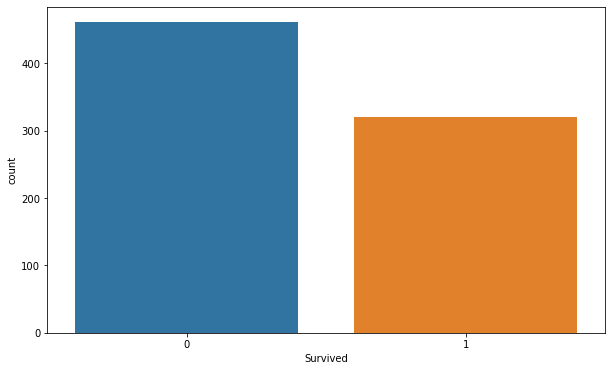

In [16]:
plt.figure(figsize=(10,6))
sns.countplot('Survived',data=df)
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most passengers not survived </p>


----------

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


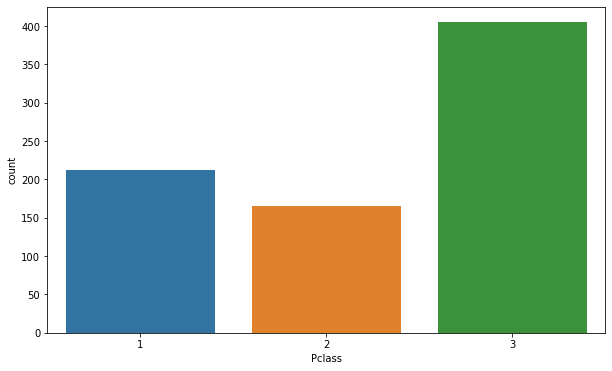

In [17]:
plt.figure(figsize=(10,6))
sns.countplot('Pclass',data=df)
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most passengers was in Pclass '3' </p> 


-------------------------

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


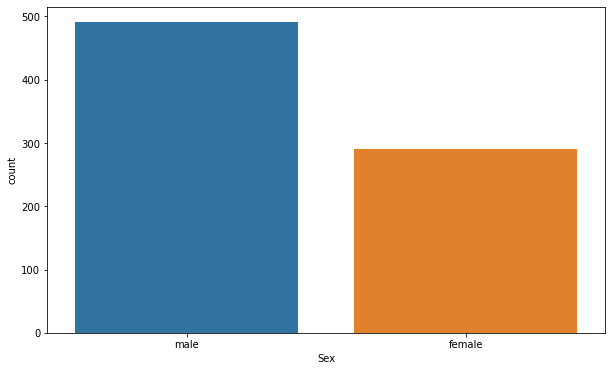

In [18]:
plt.figure(figsize=(10,6))
sns.countplot('Sex',data=df)
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most passengers was male </p>


------------------------

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


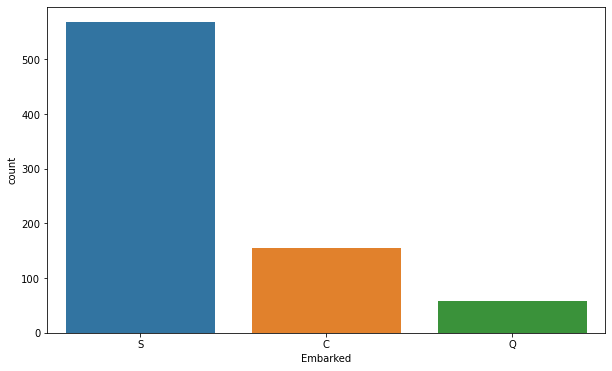

In [19]:
plt.figure(figsize=(10,6))
sns.countplot('Embarked',data=df)
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most passengers emparked from ' Southampton ' </p>


-------------------

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


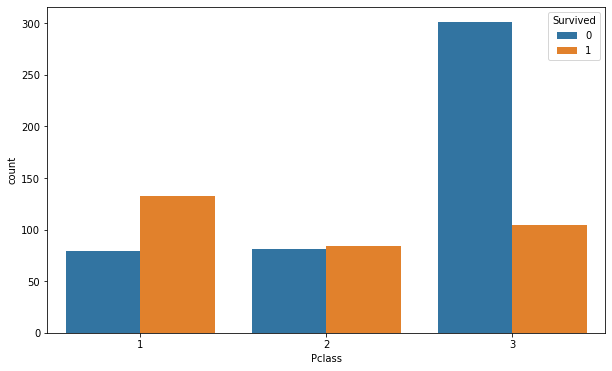

In [20]:
plt.figure(figsize=(10,6))
sns.countplot('Pclass',hue='Survived',data=df)
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most unsurvived passengers was in Pclass '3' </p>


---------------

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


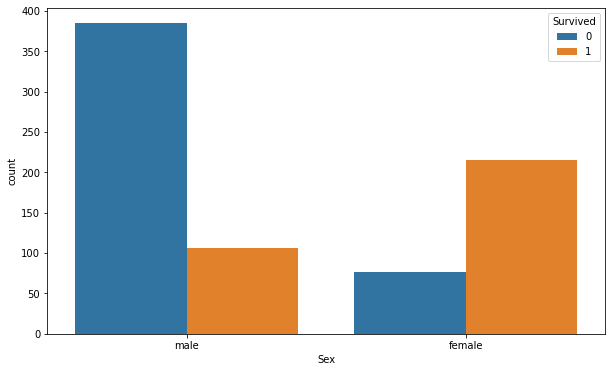

In [21]:
plt.figure(figsize=(10,6))
sns.countplot('Sex',hue='Survived',data=df)
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most unsurvived passengers was men </p>


--------------------------------

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


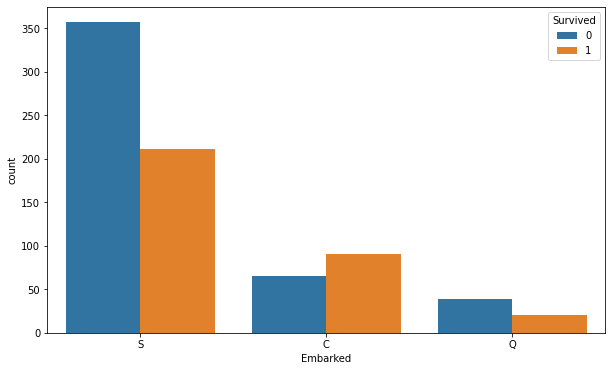

In [22]:
plt.figure(figsize=(10,6))
sns.countplot('Embarked',hue='Survived',data=df)
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most unsurvived passengers was embarked from ' Southampton ' </p>


----------------------

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


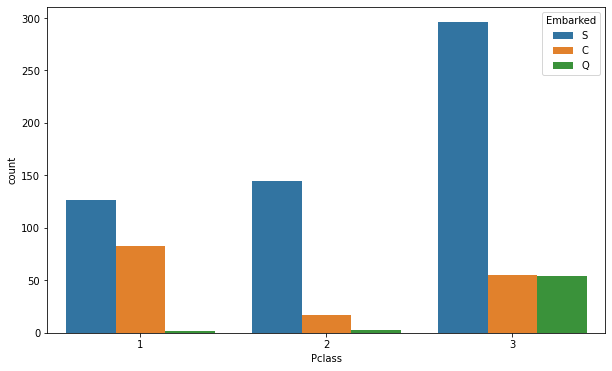

In [23]:
plt.figure(figsize=(10,6))
sns.countplot('Pclass',hue='Embarked',data=df)
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> In 3 Pclasses the most passengers of it were from Southampton </p>


------------------------

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


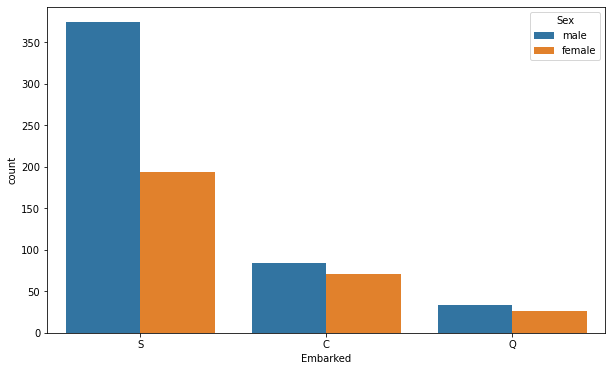

In [24]:
plt.figure(figsize=(10,6))
sns.countplot('Embarked',hue='Sex',data=df)
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> From 3 Emparked ports , the most passengers of it were men </p>


-----------------------------

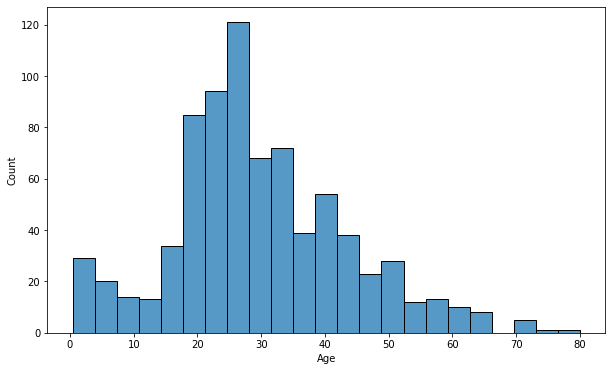

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'])
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most passengers were in range [20-35] in age </p>


---------------------------------

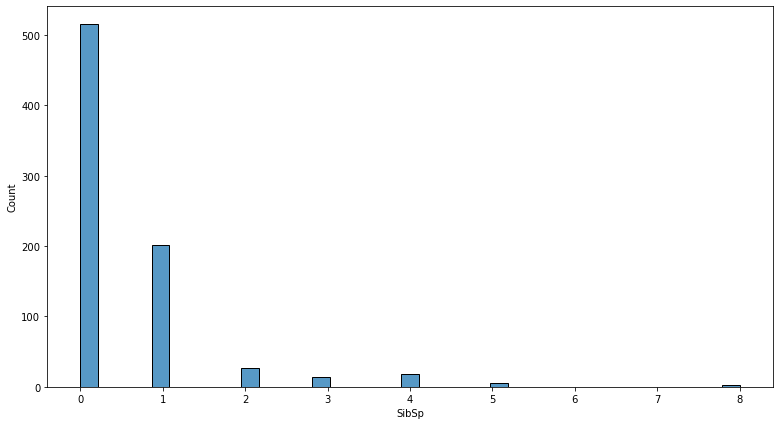

In [26]:
plt.figure(figsize=(13,7))
sns.histplot(df['SibSp'])
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most passengers have no siblings or spouses in titanik </p>


---------------------------------

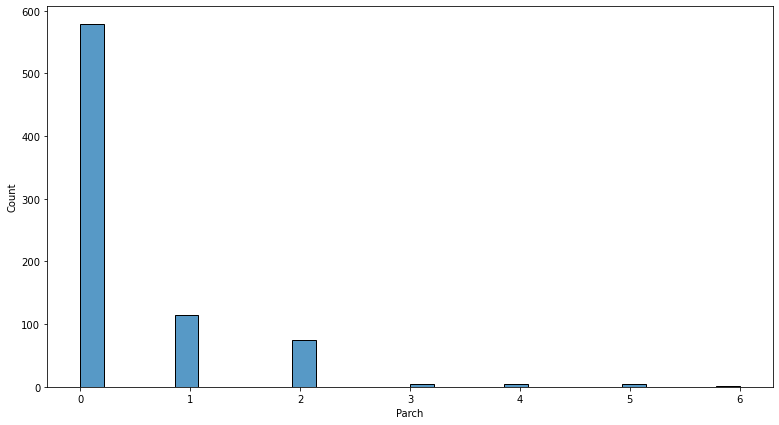

In [27]:
plt.figure(figsize=(13,7))
sns.histplot(df['Parch'])
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most passengers have no  parents in children titanik </p>


-------------------------------

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


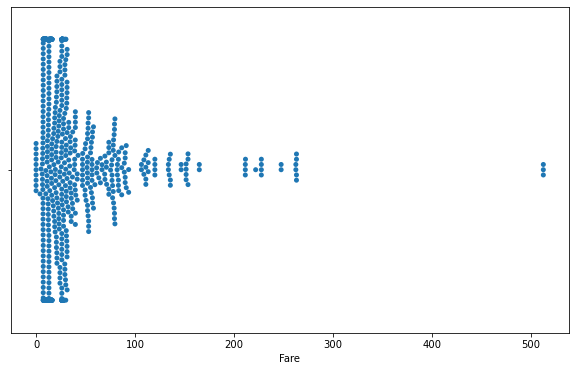

In [28]:
plt.figure(figsize=(10,6))
sns.swarmplot(df['Fare'])
plt.show()

<p style="color:#2965A5;
          font-size:22px;"> -> Most fares of passengers was under 100 $ </p>


--------------
<p style="background-color:#808E9C;color:white;font-size:200%;"> Darta correlatin </p>

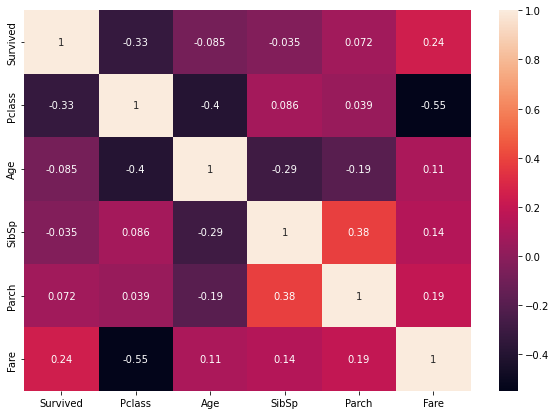

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

----------------

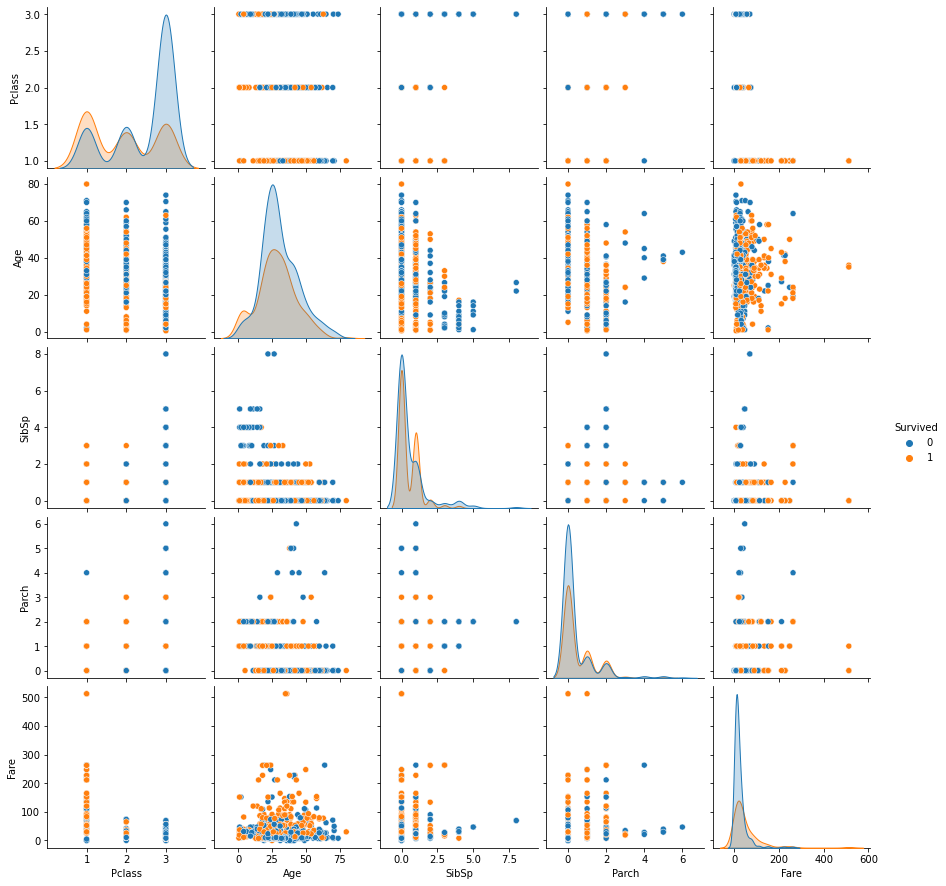

In [30]:
#very important plot
sns.pairplot(hue='Survived',data=df)
plt.show()